<a href="https://colab.research.google.com/github/AntoniXGaudi/Data_Analysis_1/blob/main/soldier_race_project_students_with_remarks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import jupyter_black

# jupyter_black.load()

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be some of the challenges you might encounter.

Also, this project aims to increase your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for multi-class classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data*
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)
                                               If less 500, then model can pb not learn

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [ ]:
# !conda install -c conda-forge xgboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (7,4)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    make_scorer,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    average_precision_score,
    roc_curve,
    auc,
)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)
pd.set_option("display.width", 1000)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [ ]:
df_male = pd.read_csv(
    "https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr", encoding="latin-1"
)

In [ ]:
df_female = pd.read_csv("https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq")

# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

In [ ]:
df_male.sample(10)

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
2684,25014,253,1482,342,216,1368,242,200,389,341,269,483,75,344,317,143,993,236,876,625,517,363,1538,282,1029,247,1320,886,625,356,33,67,22,243,815,101,259,344,304,542,475,1116,89,213,191,152,581,205,331,74,326,366,1058,640,435,445,493,552,488,71,402,117,393,429,1418,116,435,264,1125,371,141,929,854,596,1753,1776,1446,1122,609,196,827,460,129,892,1694,515,323,917,220,382,1064,816,173,872,Male,25-Oct-11,Fort Bragg,Regular Army,Combat Service Support,92Y,Pennsylvania,1,NaN,1,28,72,181,Right hand
1215,14796,335,1443,330,234,1314,267,194,416,384,269,539,74,350,320,140,1104,280,863,612,489,418,1501,310,1176,288,1266,809,669,385,38,72,27,252,802,106,259,337,327,619,458,1115,92,223,187,149,578,207,347,78,371,426,1028,640,486,490,467,553,477,77,464,129,422,444,1444,115,402,253,1225,361,148,905,897,575,1784,1730,1433,1105,694,201,787,454,130,881,1766,508,381,1170,305,447,1011,1035,190,873,Male,15-Mar-11,Camp Atterbury,Army National Guard,Combat Support,91B,Indiana,1,NaN,1,46,69,220,Left hand
2569,24338,242,1480,350,204,1374,234,193,427,328,283,508,69,345,322,145,996,222,898,628,524,353,1560,286,1018,235,1329,848,609,359,34,67,22,258,830,96,260,354,299,570,477,1155,83,200,180,157,590,205,323,68,344,356,1050,630,405,418,497,552,496,69,383,124,393,441,1426,115,436,265,1160,371,137,956,918,609,1815,1813,1469,1135,590,188,824,469,134,912,1689,500,311,898,210,352,1090,788,162,864,Male,18-Oct-11,Fort Bragg,Regular Army,Combat Arms,12B,Ohio,1,NaN,1,30,73,180,Right hand
1328,14964,274,1594,371,230,1472,264,217,440,384,284,539,74,337,311,142,1073,269,1016,684,555,412,1651,294,1099,269,1393,940,650,355,26,57,24,221,826,106,295,391,335,575,532,1255,90,227,215,150,563,200,369,75,359,394,1193,710,481,500,554,629,557,86,447,128,391,429,1583,134,494,305,1261,405,161,927,970,663,1996,1894,1579,1242,672,200,896,540,133,1020,1735,480,323,995,252,412,1180,997,180,921,Male,18-Mar-11,Camp Atterbury,Army National Guard,Combat Service Support,92A,Indiana,2,NaN,2,45,74,220,Right hand
2609,24563,233,1410,334,239,1298,248,200,425,367,284,524,78,321,312,142,1034,245,854,612,495,412,1489,306,1084,270,1253,836,600,325,33,58,22,224,792,101,264,336,307,563,458,1116,90,210,176,155,571,199

In [ ]:
df_female.sample(10)

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
422,17468,192,1295,310,202,1204,219,174,357,282,267,431,64,300,281,129,1030,209,798,566,459,366,1365,279,899,230,1120,762,582,332,31,57,20,198,739,90,227,308,253,469,421,1051,75,182,180,151,557,191,295,60,370,411,970,605,360,375,438,498,442,61,400,121,316,363,1263,107,370,222,1025,331,128,842,810,525,1625,1596,1296,1011,630,154,743,421,126,840,1501,408,275,779,162,349,960,599,152,761,Female,6-Jun-11,Fort McCoy,Army National Guard,Combat Service Support,74B,Minnesota,1,NaN,1,33,64,133,Right hand
1819,28821,186,1303,288,210,1208,228,174,352,271,246,414,63,295,275,129,943,213,798,565,474,373,1368,267,930,239,1149,751,634,322,35,63,21,253,755,87,235,294,242,443,415,990,78,188,177,141,540,184,310,62,330,352,967,565,387,402,435,495,460,66,367,111,310,360,1249,101,387,220,957,312,132,855,750,506,1535,1604,1298,1030,549,152,700,427,115,812,1528,402,248,667,163,310,978,551,144,807,Female,15-Mar-12,Camp Shelby,Army National Guard,Combat Service Support,31B,Georgia,1,NaN,1,24,64,125,Right hand
1628,28174,194,1307,294,210,1212,215,173,349,259,254,420,62,292,267,118,942,205,797,546,456,343,1353,257,888,235,1154,726,628,334,33,55,20,277,784,86,233,294,231,474,410,987,76,177,169,136,523,181,296,60,333,370,957,550,388,395,423,477,438,60,343,105,293,340,1275,105,365,220,940,314,130,887,752,500,1552,1597,1288,1017,573,163,671,415,112,814,1537,425,295,788,188,330,939,548,145,801,Female,24-Feb-12,Camp Shelby,Army National Guard,Combat Support,68W,New York,1,NaN,1,21,63,124,Right hand
541,17789,279,1306,302,233,1219,248,191,381,359,316,506,70,317,307,141,1220,282,813,592,464,453,1366,283,1072,271,1116,762,631,330,33,57,19,264,765,102,255,311,306,551,436,1072,85,196,183,154,570,197,332,76,433,480,1003,575,396,411,431,511,456,68,512,121,347,380,1372,116,358,238,1109,328,139,860,815,534,1650,1595,1318,1046,803,213,775,419,134,834,1677,437,367,1061,284,364,948,907,163,779,Female,23-Jun-11,Fort Lee,Regular Army,Combat Service Support,92A,Texas,2,NaN,2,33,63,170,Right hand
1280,25643,204,1323,311,218,1220,210,190,344,295,254,409,63,285,271,126,903,205,804,552,461,367,1373,261,849,213,1178,753,556,299,34,57,24,270,774,87,255,307,244,473,439,963,71,168,180,144,539,182,301,65,

In [ ]:
df_female.rename(
    columns={"SubjectId": "subjectid"}, inplace=True
)  # same column in both DFs, two different names: make one column out of 2

In [ ]:
df_female.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [ ]:
print(df_male.shape)
print(df_female.shape)

(4082, 108)
(1986, 108)


In [ ]:
df = pd.concat(
    [df_male, df_female], axis=0, ignore_index=True
)  # | Ignore_index: the original row
# indices are discarded and a new index is generated from 0 to n-1, where n is the total number of rows in the concatenated DataFrame.
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [ ]:
df.shape

(6068, 108)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 5.0+ MB


## Missing Values

In [ ]:
df.info(max_cols=200)  # | damit nicht 10, sondern 200 angezeigt werden!!!

# If we want to see the information of all features in dfs with
# many features, we can set max_cols to a higher value.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 108 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    subjectid                       6068 non-null   int64 
 1    abdominalextensiondepthsitting  6068 non-null   int64 
 2    acromialheight                  6068 non-null   int64 
 3    acromionradialelength           6068 non-null   int64 
 4    anklecircumference              6068 non-null   int64 
 5    axillaheight                    6068 non-null   int64 
 6    balloffootcircumference         6068 non-null   int64 
 7    balloffootlength                6068 non-null   int64 
 8    biacromialbreadth               6068 non-null   int64 
 9    bicepscircumferenceflexed       6068 non-null   int64 
 10   bicristalbreadth                6068 non-null   int64 
 11   bideltoidbreadth                6068 non-null   int64 
 12   bimalleolarbreadth              

In [ ]:
# A lot of NaNs in Ethnicity!!!

In [ ]:
df.drop("Ethnicity", axis=1, inplace=True)


In [ ]:
df.isnull().sum().any()  # check: did drop work?

False

In [ ]:
df.shape

(6068, 107)

## Duplicates ?

In [ ]:
df.duplicated().sum()

0

## Get an idea about the main groups

In [ ]:
df.DODRace.unique()

array([1, 2, 3, 4, 5, 6, 8], dtype=int64)

In [ ]:
df["DODRace"] = df.DODRace.map(
    {
        1: "White",
        2: "Black",
        3: "Hispanic",
        4: "Asian",
        5: "Native American",
        6: "Pacific Islander",
        8: "Other",
    }
)

In [ ]:
df["DODRace"].value_counts(normalize=True) * 100

DODRace
White               62.491760
Black               21.390903
Hispanic            11.189848
Asian                3.098220
Pacific Islander     0.972314
Native American      0.807515
Other                0.049440
Name: proportion, dtype: float64

In [ ]:
# || to find how many unique values object features have
for col in df.select_dtypes("object"):
    print(f"{col} : {df[col].nunique()} unique value") # |

Gender : 2 unique value
Date : 253 unique value
Installation : 12 unique value
Component : 3 unique value
Branch : 3 unique value
PrimaryMOS : 285 unique value
SubjectsBirthLocation : 152 unique value
DODRace : 7 unique value
WritingPreference : 3 unique value


In [ ]:
# || we will use one-hot-encoding, we can't use features with 285, 253 or 152 unique values, since it will
# increase the number of columns dramatically

In [ ]:
df.groupby(["Component"])["DODRace"].value_counts(normalize=True)  # |

# When we compare the distribution of the soldiers according to the units
# they serve, the white, black, hispanic distribution in the 3 units is similar
# or close to the general distribution in the original data.
# There is no component dominated by Hispanic race. We were unable to obtain
# insight into the identification of race through Component feature.

Component            DODRace         
Army National Guard  White               0.685007
                     Black               0.184269
                     Hispanic            0.093427
                     Asian               0.022157
                     Native American     0.008863
                     Pacific Islander    0.006278
Army Reserve         White               0.518182
                     Black               0.236364
                     Hispanic            0.186364
                     Asian               0.040909
                     Pacific Islander    0.013636
                     Native American     0.004545
Regular Army         White               0.580573
                     Black               0.237898
                     Hispanic            0.122611
                     Asian               0.037898
                     Pacific Islander    0.012420
                     Native American     0.007643
                     Other               0.000955
Name: propor

<Axes: ylabel='Component,DODRace'>

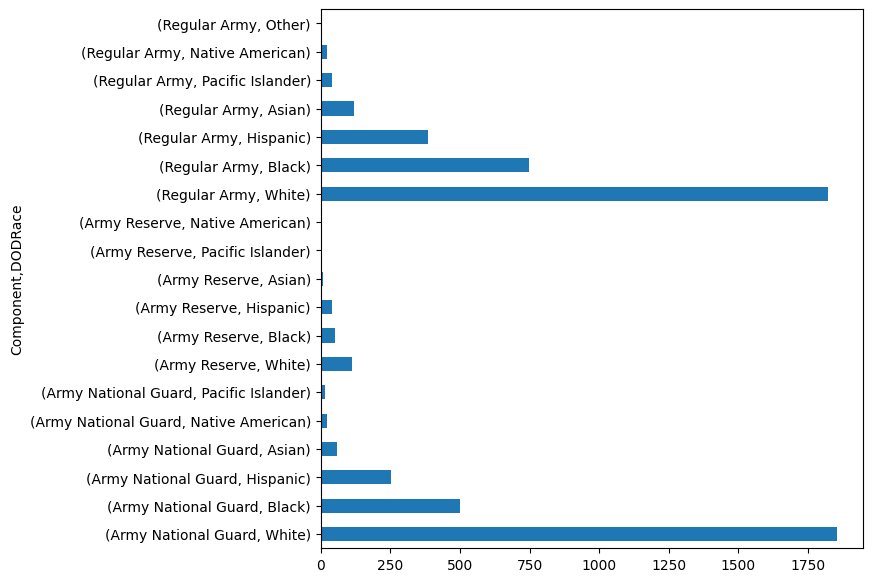

In [ ]:
df.groupby(["Component"])["DODRace"].value_counts().plot(kind="barh", figsize=(7, 7))

In [ ]:
df.groupby(["Component", "Branch"])["DODRace"].value_counts(normalize=True)

# we obtained insights similar to the insights we obtained above.
# There are no Hispanic-dominated components or branches.
# We will drop "Component", "Branch" features.

Component            Branch                  DODRace         
Army National Guard  Combat Arms             White               0.771995
                                             Black               0.097893
                                             Hispanic            0.091698
                                             Asian               0.022305
                                             Native American     0.011152
                                             Pacific Islander    0.004957
                     Combat Service Support  White               0.643509
                                             Black               0.218947
                                             Hispanic            0.099649
                                             Asian               0.023158
                                             Pacific Islander    0.007719
                                             Native American     0.007018
                     Combat Support          White

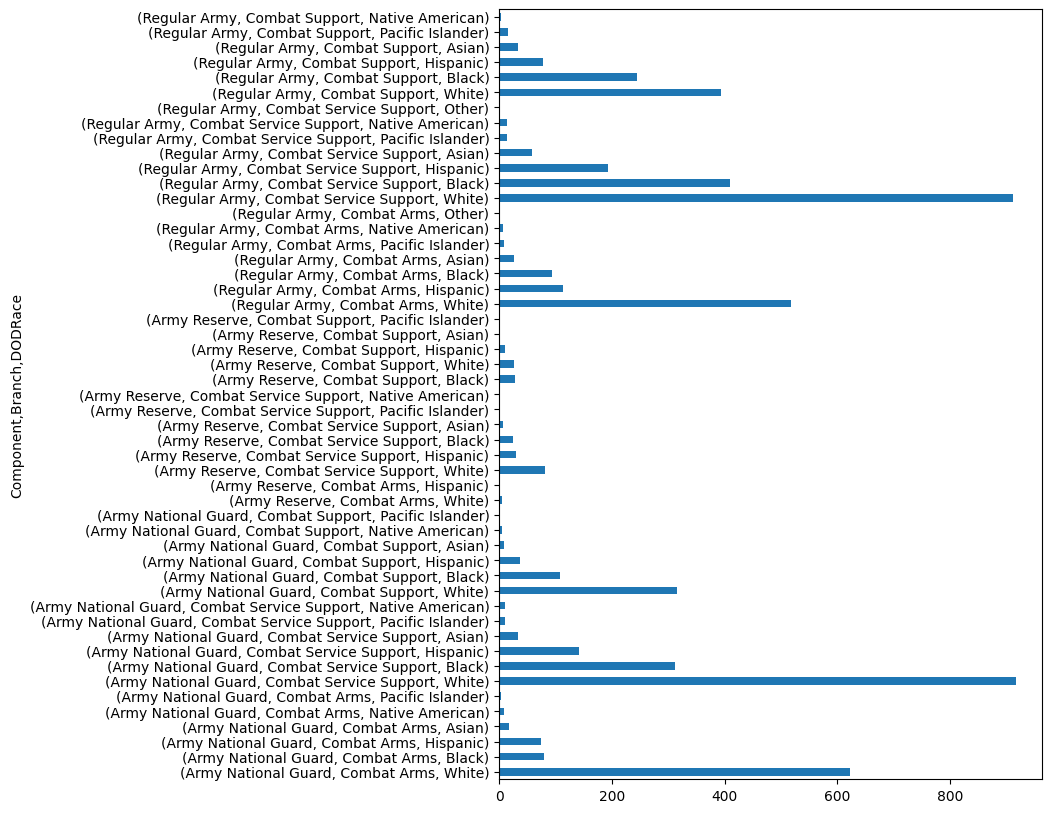

In [ ]:
df.groupby(["Component", "Branch"])["DODRace"].value_counts().plot(
    kind="barh", figsize=(7, 10)
);

In [ ]:
df.SubjectNumericRace.value_counts()

# a feature describing our target DODRace.
# We will drop it, as it will cause data leakage. | data leakage, weil die Spalten identische WErte haben
# If you have a feature in your dataset that is identical to the target variable, this can indeed cause data leakage. This is because your model could learn to simply use this feature to perfectly predict the target, which would not be possible with new, unseen data where the target is unknown.

# In practice, if you find that a feature is identical to the target, it generally means there's been
# a mistake somewhere in your data collection or preprocessing steps. You should remove this feature
# from your dataset before training your model.

SubjectNumericRace
1        3561
2        1026
3         541
31        160
51        126
8         116
4         109
21         60
6          59
41         46
61         35
23         34
28         26
251        20
5          18
18         18
25         14
351        10
38          9
64          8
62          8
35          8
42          7
63          7
231         6
43          5
235         4
218         3
651         2
2351        2
318         2
641         2
451         2
423         2
431         2
2518        2
48          1
631         1
4251        1
428         1
238         1
358         1
425         1
42351       1
Name: count, dtype: int64

In [ ]:
drop_list2 = [
    "Date",
    "Installation",
    "Component",
    "subjectid",
    "SubjectNumericRace",
    "Branch",
    "PrimaryMOS",
    "Weightlbs",
    "Heightin",
]

df.drop(columns=drop_list2, inplace=True)

In [ ]:
df.DODRace.value_counts()

DODRace
White               3792
Black               1298
Hispanic             679
Asian                188
Pacific Islander      59
Native American       49
Other                  3
Name: count, dtype: int64

In [ ]:
df2 = df[
    df["DODRace"].isin(["White", "Black", "Hispanic"])
]  # | for the others we don't have enough data points
df2

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,North Dakota,White,41,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,New York,White,35,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,New York,Black,42,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,Wisconsin,White,31,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,North Carolina,Black,21,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
df2.reset_index(drop=True, inplace=True)  # |

In [ ]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
abdominalextensiondepthsitting,5769.0,247.254290,37.457748,155.0,220.0,243.0,272.0,451.0
acromialheight,5769.0,1408.630265,78.303123,1146.0,1353.0,1412.0,1464.0,1683.0
acromionradialelength,5769.0,328.071590,20.444554,249.0,314.0,328.0,342.0,393.0
anklecircumference,5769.0,225.201768,15.965783,156.0,214.0,225.0,235.0,293.0
axillaheight,5769.0,1301.902583,71.260913,1062.0,1252.0,1304.0,1351.0,1553.0
balloffootcircumference,5769.0,244.408043,16.803556,186.0,233.0,245.0,256.0,306.0
balloffootlength,5769.0,195.118911,13.379000,151.0,186.0,196.0,205.0,245.0
biacromialbreadth,5769.0,399.706015,30.124094,283.0,377.0,404.0,422.0,489.0
bicepscircumferenceflexed,5769.0,341.663027,41.270615,216.0,312.0,342.0,370.0,490.0
bicristalbreadth,5769.0,274.903449,19.239580,197.0,262.0,274.0,288.0,362.0


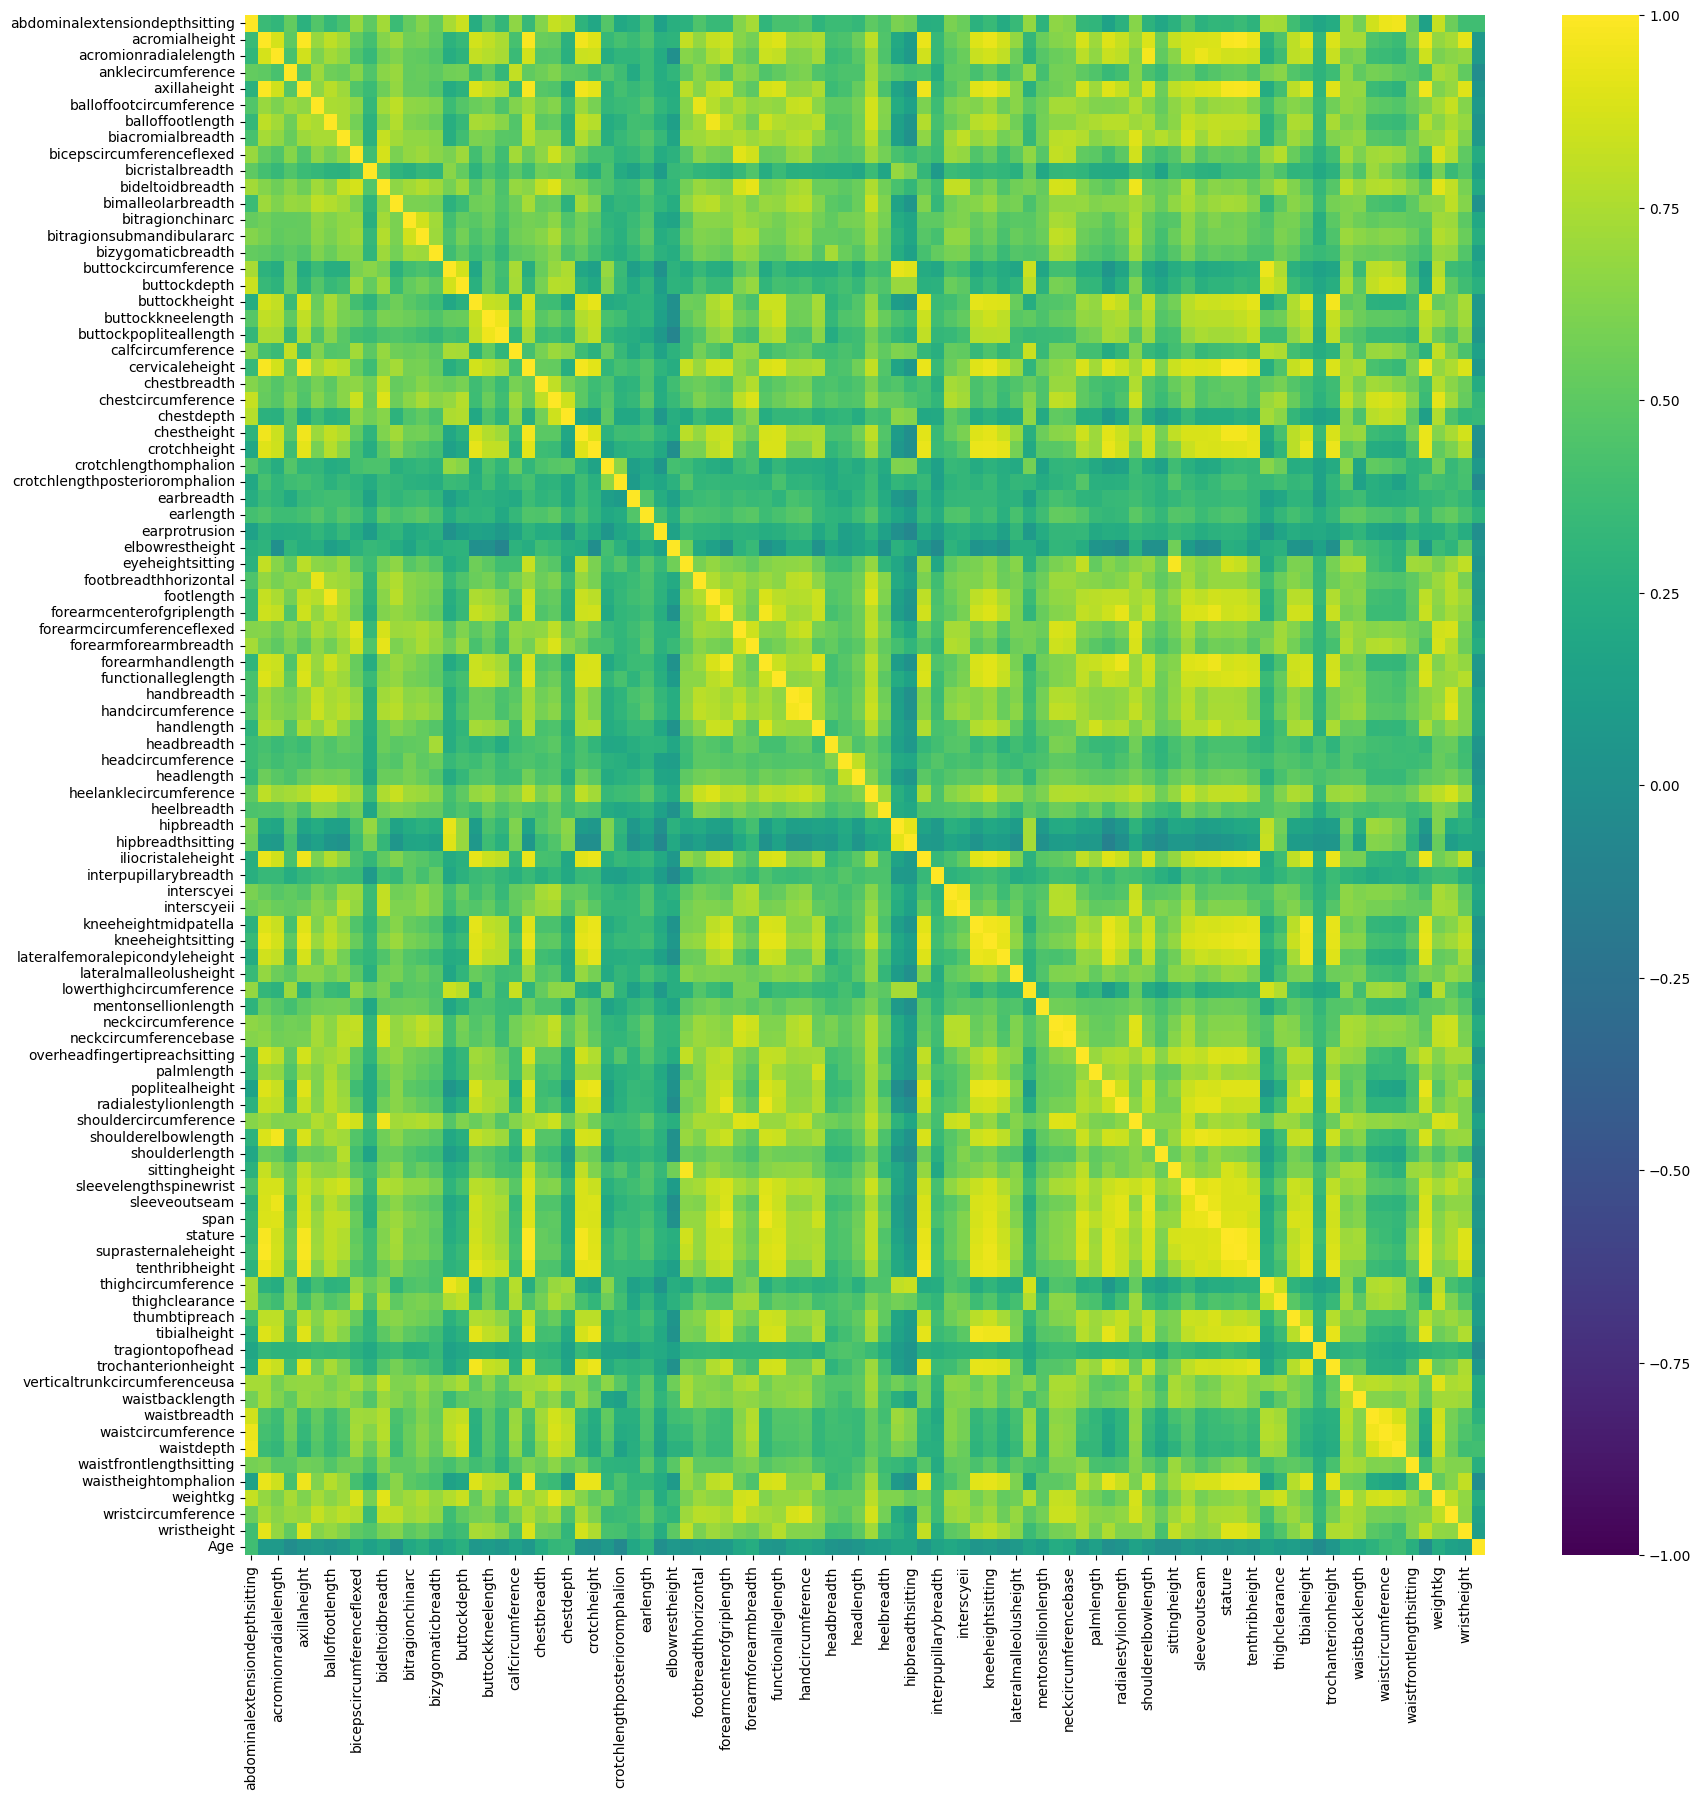

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(
    df2.corr(numeric_only=True), vmin=-1, vmax=1, cmap="viridis"
);  # |numeric_only=True necessary or not, now yes, in prev. version no

# | has a multicollinearity issue, but it's fine for logregg with regularisation and non-parametric algorithms.

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [ ]:
# Which categorical features are still there?
non_numerical_df = df.select_dtypes(include=['object', 'category'])
non_numerical_df.head()

,Gender,SubjectsBirthLocation,DODRace,WritingPreference
0,Male,North Dakota,White,Right hand
1,Male,New York,White,Left hand
2,Male,New York,Black,Left hand
3,Male,Wisconsin,White,Right hand
4,Male,North Carolina,Black,Right hand


In [ ]:
X = df2.drop(
    columns=["DODRace"]
)  # | Bevor wir mit den verschiedenen Models loslegen, teilen wir das
y = df2.DODRace  # | Data Set in Train und Test Set für alle Models als Basis

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=101,
    stratify=y,  # | tpr preserve the same distr. in test and train sets
)

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to check if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity check of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [ ]:
# Comparing Train and Test Set

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
cat = X_train.select_dtypes("object").columns  # | the columns that have to be encoded
cat

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

column_trans = make_column_transformer(  # || in column_trans stecken wir OneHotEncoderm cat und den scaler
    (
        OneHotEncoder(handle_unknown="ignore", sparse_output=False),
        cat,
    ),  # | if 1 out of the 4 above is not in test set, it will throw an error
    remainder=MinMaxScaler(),  # | here the scaler comes into play
    verbose_feature_names_out=False,
)

In [ ]:
from sklearn.pipeline import Pipeline

operations = [
    (
        "OneHotEncoder",
        column_trans,
    ),  # ||  in column_trans steckt MinMaxScaler, und wandert an dieser Stelle als Input in den Encoder
    (
        "log",
        LogisticRegression(
            class_weight="balanced", max_iter=10000, random_state=101
        ),  # | max_iter=10000: if the solver is not able to come up with a solution, it will give you a warning, then you can increase the number > 10.000
    ),
]

pipe_log_model = Pipeline(steps=operations)
# | Pipeline besteht aus OneHotEncoder, LogisticRegression u. indir. Scaler

# || LogisticRegression: class_weight="balanced", the algorithm will automatically adjust weights inversely proportional to
# class frequencies in the input data. In other words, it will assign a higher weight to the minority
# class and a lower weight to the majority class.
# With larger weights assigned to the minority class, the model will be more sensitive to
# | correctly classifying instances from the minority class.

In [ ]:
pipe_log_model.fit(X_train, y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[239  14   7]
 [  5 111  20]
 [ 25  89 644]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.90       260
    Hispanic       0.52      0.82      0.63       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 971   38   29]
 [  20  456   67]
 [  57  362 2615]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93      1038
    Hispanic       0.53      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.88      4615



In [ ]:
# | the metrics for Hispanic are problematic, in particularly between Hispanic and White
# we get a lower recall for white because of class_weight="balanced
# Precision = TP/TP+FP is very bad for Hispanics

In [ ]:
# | scoring ist ein Parameter von CV
# | Wir picken uns 3 metrics für CV heraus, die uns besonders interessieren und packen sie in die Variable
# | scoring. Bei "scoring" werden uns dann diese 3 Variablen für test und training data set angezeigt,
# | so wie es für CV sinnvoll ist.


scoring = {
    "precision_Hispanic": make_scorer(
        precision_score, average=None, labels=["Hispanic"]
    ),
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=["Hispanic"]),
    "f1_Hispanic": make_scorer(f1_score, average=None, labels=["Hispanic"]),
}

In [ ]:
operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

model = Pipeline(steps=operations)

scores = cross_validate(
    model,
    X_train,
    y_train,
    scoring=scoring,
    cv=10,
    n_jobs=-1,
    return_train_score=True,  # | Hier haben wir unser score
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.490303
train_precision_Hispanic    0.533306
test_recall_Hispanic        0.773333
train_recall_Hispanic       0.838958
test_f1_Hispanic            0.599420
train_f1_Hispanic           0.652069
dtype: float64

In [ ]:
# model ist consistent (schlecht), die Werte weichen nicht so stark in Test - und Training set ab.
# Aber das Ergebnis ist schlecht.

### Logistic Model GridsearchCV

In [ ]:
recall_Hispanic = make_scorer(recall_score, average=None, labels=["Hispanic"])
# unser scoring für GridSearchCV/log_model_grid

In [ ]:
param_grid = {
    "log__C": [0.5, 1],  # the lower the C value, the higher the regulation strength
    "log__penalty": ["l1", "l2"],
    "log__solver": ["liblinear", "lbfgs"],
}

In [ ]:
# | Frage: ab welchem SChritt müssen wir GridsearchCV durchführen? GridSearch durchläuft - für JEDE Parameterkombination -
# | den GANZEN PROZESS von Vorne bis Hinten, alles was wir bisher im Vorfeld gemacht haben inklussive CV!!
# | Rechenaufwand: GANZER PROZESS * Anzahl der Parameterkombinationen
# | GridsearchCV durchläuft die Hyperparameter des entspr. Models, hier LogisticRegression.
# | LogisticRegression ist in die Pipeline integriert => GridSearchCV muss damit in jeder Iteration
# | die Pipeline durchlaufen, der Inhalt der Pipeline wird über model an GridSearchCV
# geliefert


operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

model = Pipeline(steps=operations)


log_model_grid = GridSearchCV( # | GridSearchCV(...)
    model,
    param_grid,
    scoring=recall_Hispanic,
    cv=10,
    n_jobs=-1,
    return_train_score=True,
)

In [ ]:
log_model_grid.fit(X_train, y_train)  # | GridSearch liefert die optim. Hyperparameter,
# wir müssen aber für das optimale Model als Input unsere Trainingsdaten geben

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log__C': [0.5, 1], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [ ]:
log_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('log',
                 LogisticRegression(C=1, class_weight='balanced',
                                    max_iter=10000, random_state=101))])

In [ ]:
pd.DataFrame(log_model_grid.cv_results_).loc[  # .cv_results_ liefert scoring
    log_model_grid.best_index_, ["mean_test_score", "mean_train_score"]
]  # | über "log_model_grid.best_index_" ermitteln wir das beste Ergebnis über die 8 Iterationen
# | der Hyperparameter für unser scoring=recall_Hispanic

mean_test_score     0.773333
mean_train_score    0.838958
Name: 7, dtype: object

In [ ]:
# exactly the same as above , because used the same hyperparameters

In [ ]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[239  14   7]
 [  5 111  20]
 [ 25  89 644]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.90       260
    Hispanic       0.52      0.82      0.63       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 971   38   29]
 [  20  456   67]
 [  57  362 2615]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93      1038
    Hispanic       0.53      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.88      4615



ERROR: Invalid requirement: '#'
'install' is not recognized as an internal or external command,
operable program or batch file.


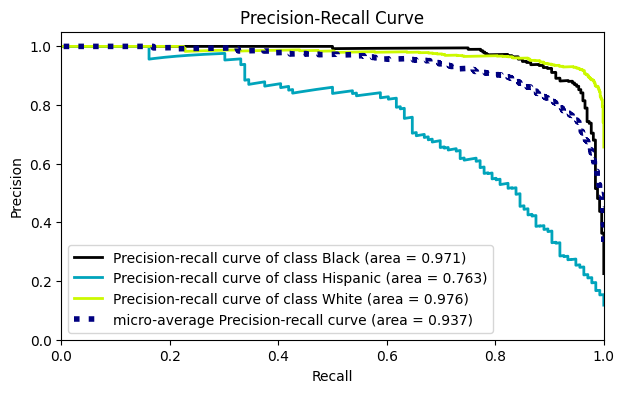

In [ ]:
!pip install scikit-plot   #   || install bevor ich es gebrauche!!!!

from scikitplot.metrics import plot_roc, plot_precision_recall


operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)  # || plot_precision_recall using your test data and the predict data of your alg and comparing them
plt.show();

In [ ]:
# Bemerkung:  | The ROC curve has different input parameters:
# estimator: The trained binary classifier (e.g., logistic regression, SVM, etc.).
#    X: The feature matrix of the test data.
#    y: The true labels of the test data.

In [ ]:
pd.get_dummies(y_test).values  # | target is multi-class, so we can get multi-class

array([[False, False,  True],
       [False, False,  True],
       [False, False,  True],
       ...,
       [False, False,  True],
       [False, False,  True],
       [False,  True, False]])

In [ ]:
from sklearn.metrics import average_precision_score

y_test_dummies = pd.get_dummies(y_test).values

# | Folgendes Vorgehen in den folg. Zeilen: wir blasen unsere Target-Spalte, die die einer der 3 Werte 0 black, 1 hispanic, 2 white
# haben kann in eine 3-Spalten Matrix y_test_dummies, in der True steht, wenn der entspr. Wert (black, hispanic, white) in der
# Target Spalte steht. Da uns insbesonder die Spalte "hispanic" interessiert, verwenden wir diese dann als Input um unsere
# metrics zu errechnen, s.u. log_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

y_test_dummies
# Returns 0 black, 1 hispanic, 2 white scores.
# We got hispanic scores by specifying 1 here.|

array([[False, False,  True],
       [False, False,  True],
       [False, False,  True],
       ...,
       [False, False,  True],
       [False, False,  True],
       [False,  True, False]])

In [ ]:
y_pred = log_model_grid.predict(X_test)

log_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1]) # | now we use y_test_dummies[:, 1]
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

# | Since we will compare the scores we got from all models at the end of the notebook,
# we assign model scores to the variables.

## 2. SVC

### Vanilla SVC model

In [ ]:
operations_svc = [
    ("OneHotEncoder", column_trans),
    ("svc", SVC(class_weight="balanced", random_state=101)),
]

pipe_svc_model = Pipeline(
    steps=operations_svc
)  # | gleiches Schema: pipeline(oneHatenocder, MOdel und scale indirect über column_trans)

In [ ]:
pipe_svc_model.fit(X_train, y_train)

eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[240  12   8]
 [  5 111  20]
 [ 20 109 629]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.91       260
    Hispanic       0.48      0.82      0.60       136
       White       0.96      0.83      0.89       758

    accuracy                           0.85      1154
   macro avg       0.78      0.86      0.80      1154
weighted avg       0.89      0.85      0.86      1154


Train_Set
[[ 956   42   40]
 [  23  456   64]
 [  54  426 2554]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92      1038
    Hispanic       0.49      0.84      0.62       543
       White       0.96      0.84      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.87      0.81      4615
weighted avg       0.90      0.86      0.87      4615



In [ ]:
model = Pipeline(steps=operations_svc)

scores = cross_validate(  # Tab ,siehe C and gamma. C high, reglu. strength low, the same with
    # gamma, influence area of each data point, if gamma too large, then you have ...if gamma is too large,
    # then C ...your model cannot compensate for that, 20.33
    model,
    X_train,
    y_train,
    scoring=scoring,
    cv=10,
    n_jobs=-1,
    return_train_score=True,

    # ||| cross_validate gibt uns zurück (=scores), was ich zuvor als scoring definiert habe
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.450808
train_precision_Hispanic    0.495061
test_recall_Hispanic        0.760404
train_recall_Hispanic       0.835275
test_f1_Hispanic            0.565226
train_f1_Hispanic           0.621644
dtype: float64

###  SVC Model GridsearchCV

In [ ]:
param_grid = {"svc__C": [0.5, 1], "svc__gamma": ["scale", "auto", 0.01]}

In [ ]:
operations_svc = [
    ("OneHotEncoder", column_trans),
    ("svc", SVC(class_weight="balanced", random_state=101)),
]

model = Pipeline(steps=operations_svc)

svm_model_grid = GridSearchCV(
    model,
    param_grid,
    scoring=recall_Hispanic,
    cv=10,
    n_jobs=-1,
    return_train_score=True,
)

In [ ]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.5, 1],
                         'svc__gamma': ['scale', 'auto', 0.01]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [ ]:
svm_model_grid.best_estimator_  # | we see the parameters that were selected by the parameters

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('svc', SVC(C=1, class_weight='balanced', random_state=101))])

In [ ]:
pd.DataFrame(svm_model_grid.cv_results_).loc[
    svm_model_grid.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.760404
mean_train_score    0.835275
Name: 3, dtype: object

In [ ]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[240  12   8]
 [  5 111  20]
 [ 20 109 629]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.91       260
    Hispanic       0.48      0.82      0.60       136
       White       0.96      0.83      0.89       758

    accuracy                           0.85      1154
   macro avg       0.78      0.86      0.80      1154
weighted avg       0.89      0.85      0.86      1154


Train_Set
[[ 956   42   40]
 [  23  456   64]
 [  54  426 2554]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92      1038
    Hispanic       0.49      0.84      0.62       543
       White       0.96      0.84      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.87      0.81      4615
weighted avg       0.90      0.86      0.87      4615



In [ ]:
# test and train set very close

In [ ]:
# | m * (m-1)/2 = 3 we will have 3 columns when we run his decision have 3 columns class 1 vs class 2,
# class 1 vs class 3 and class 2 vs class 3, for each of the classes you need to do you get the
# it gives us the side on which the decission falls and the confidence of the decision:

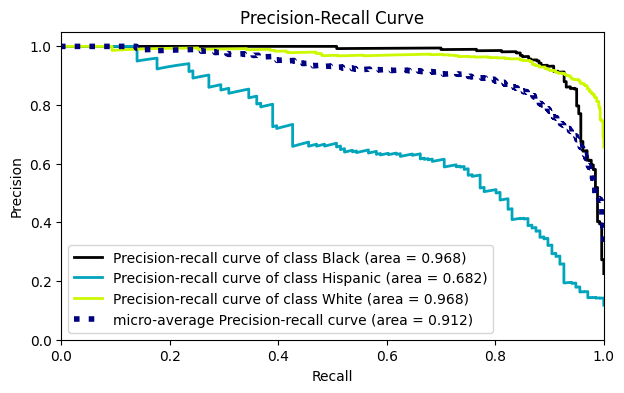

In [ ]:
operations = [
    ("OneHotEncoder", column_trans),
    ("svc", SVC(C=1, class_weight="balanced", random_state=101)),
]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

decision_function = model.decision_function(X_test) # | see below

plot_precision_recall(y_test, decision_function)
plt.show();

# plot_precision_recall() aus der Bibliothek scikit-learn erwartet als Argumente die wahren
# Zielwerte y_test und entweder die vorhergesagten Wahrscheinlichkeiten y_pred_proba oder die
# Ergebnisse der Entscheidungsfunktion decision_function.
# | Die Funktion plot_precision_recall() kann mit beiden Formaten der Vorhersagen umgehen, da
# sie intern entsprechende Berechnungen durchführt, um die Kurven zu erstellen, unabhängig
# davon, ob Wahrscheinlichkeiten oder Entscheidungsfunktionen übergeben werden.

# y_pred_proba = model.predict_proba(X_test)


#

In [ ]:
decision_function  # |

# Column 1: class 1 vs class 2
# Column 2: cl 1 vs cl3
# Column 3: cl 2 vs cl 3

array([[-0.2564319 ,  1.00050884,  2.25640477],
       [ 0.90085897, -0.23090633,  2.24269653],
       [-0.20606989,  2.17429357,  1.11451401],
       ...,
       [ 1.05232344, -0.18051267,  2.16624964],
       [-0.15450499,  2.11881204,  1.07890713],
       [-0.25949425,  1.17576515,  2.23526051]])

In [ ]:
# | The decision function gives the distance of each sample to the decision boundary. The sign of this
# | distance determines the predicted class: a positive distance corresponds to the positive class
# | (class 1) and a negative distance to the negative class (class 0). The magnitude of the distance
# | can be interpreted as a measure of confidence in the prediction.
# The decision_function serves as input for average_precision_score

In [ ]:
model.classes_

array(['Black', 'Hispanic', 'White'], dtype=object)

In [ ]:
average_precision_score(
    y_test_dummies[:, 1], decision_function[:, 1])  # column that represents Hispanics

# y_test_dummies[:, 1]: the true target labels for the positive class (class 1) in the test dataset.
# decision_function[:, 1]: is an array containing the predicted decision scores for the positive class.
# | average_precision_score() then takes these two arrays as input and calculates the average precision
# score, which is a single scalar value representing the performance of the model for the positive
# class.


# | The average_precision_score() function from the scikit-learn library is used to calculate the
# | average precision score for binary classification tasks. In our case it's binary between class 1 (white) and class 3 (hispanic)
# | so what is does is: it takes the cases where the algorithm predicts hispanic from y_test_dummies[:, 1] and combines it with
# | the corresponding class 1 vs class 3 column of the decision function - which gives the distance of each sample to the decision
# | boundary. Without really knowing how it works, it spits out average_precision_score vor class 3 (=hispanics)
# | The average_precision_score function in scikit-learn calculates the area under the precision-recall curve (AUC-PR) for a binary classification model. The range of the average precision score is between 0 and 1.
# | usually, the input looks like average_precision_score(y_true, y_predicuted), but instead of y_predicuted, it can also take
# | the decision_function(X_test)

# It is commonly used as a performance metric
# to evaluate the quality of a binary classification model's predictions, particularly when dealing
# | with imbalanced datasets.

0.6822405823886313

In [ ]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = average_precision_score(y_test_dummies[:, 1], decision_function[:, 1])
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

In [ ]:
# | now to the decision tree algorithms: bagging: RF, boosting: XGBoost

## 3. RF

In [ ]:
# || no need to scale the data for these two

In [ ]:
cat

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [ ]:
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder="passthrough")

In [ ]:
# | we don't do OneHotEncoder here, but OrdinalEncoder

### Vanilla RF Model

In [ ]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101)),
]

pipe_model_rf = Pipeline(steps=operations_rf)

pipe_model_rf.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [ ]:
eval_metric(pipe_model_rf, X_train, y_train, X_test, y_test)

Test_Set
[[191   0  69]
 [ 10   6 120]
 [ 10   2 746]]
              precision    recall  f1-score   support

       Black       0.91      0.73      0.81       260
    Hispanic       0.75      0.04      0.08       136
       White       0.80      0.98      0.88       758

    accuracy                           0.82      1154
   macro avg       0.82      0.59      0.59      1154
weighted avg       0.82      0.82      0.77      1154


Train_Set
[[1038    0    0]
 [   0  542    1]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [ ]:
# Horrible, e.g. recall Hispanic

In [ ]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101)),
]

model = Pipeline(steps=operations_rf)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=5, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic     0.777143
train_precision_Hispanic    1.000000
test_recall_Hispanic        0.025807
train_recall_Hispanic       1.000000
test_f1_Hispanic            0.049538
train_f1_Hispanic           1.000000
dtype: float64

In [ ]:
# CV same picture: train set perfect, train set very, very bad

### RF Model GridsearchCV

In [ ]:
param_grid = {
    "RF_model__n_estimators": [400, 500],  # | die wichtigsten Hyperparam: Anz. der Bäume und Tiefe
    "RF_model__max_depth": [2, 3],
    # 'RF_model__min_samples_split':[18,20,22],
    # 'RF_model__max_features': ['auto', None, 15, 20]
}

In [ ]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    (
        "RF_model",
        RandomForestClassifier(class_weight="balanced", random_state=101),
    ),  # | Tab: chekc in class_weight
]

model = Pipeline(steps=operations_rf)
rf_grid_model = GridSearchCV(
    model, param_grid, scoring=recall_Hispanic, n_jobs=-1, return_train_score=True
)

In [ ]:
rf_grid_model.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3],
                         'RF_model__n_estimators': [400, 500]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [ ]:
rf_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=2,
                                        n_estimators=400, random_state=101))])

In [ ]:
rf_grid_model.best_params_

{'RF_model__max_depth': 2, 'RF_model__n_estimators': 400}

In [ ]:
pd.DataFrame(rf_grid_model.cv_results_).loc[
    rf_grid_model.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.609582
mean_train_score    0.645955
Name: 0, dtype: object

In [ ]:
# worst model we have seen so far, we might improve it when we take a larger grid

In [ ]:
rf_grid_model.best_score_

0.6095820591233435

In [ ]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[174  50  36]
 [ 16  76  44]
 [ 91 244 423]]
              precision    recall  f1-score   support

       Black       0.62      0.67      0.64       260
    Hispanic       0.21      0.56      0.30       136
       White       0.84      0.56      0.67       758

    accuracy                           0.58      1154
   macro avg       0.56      0.60      0.54      1154
weighted avg       0.72      0.58      0.62      1154


Train_Set
[[ 702  204  132]
 [  45  346  152]
 [ 246 1105 1683]]
              precision    recall  f1-score   support

       Black       0.71      0.68      0.69      1038
    Hispanic       0.21      0.64      0.31       543
       White       0.86      0.55      0.67      3034

    accuracy                           0.59      4615
   macro avg       0.59      0.62      0.56      4615
weighted avg       0.75      0.59      0.64      4615



In [ ]:
# not as good as the other ones: 21:06, surprising since RF ist usually a very good algorithm

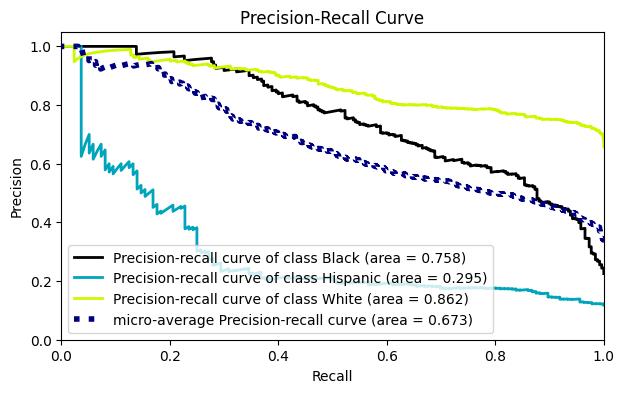

In [ ]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    (
        "RF_model",
        RandomForestClassifier(
            class_weight="balanced", max_depth=2, n_estimators=400, random_state=101
        ),
    ),
]

model = Pipeline(steps=operations_rf)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)  # | so kommen wir auf y_pred_proba

plot_precision_recall(y_test, y_pred_proba) # || das ist die precision_recall Kurve (Ideal RECHTS oben),
# Nicht zu verwechseln mit der ROC (Sensitivity vs 1 - Specifity, Ideal LINKS oben)
plt.show();

In [ ]:
# this model confused White and Hispanic

In [ ]:
average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
# | average_precision_score is binary, it can't deal with dim > 2. However, we have 3 variables. That's why we need to splice
# | the relevant columns from the dataframes y_test_dummies[:, 1], y_pred_proba[:, 1]
# | It computes the average precision from prediction scores. This score
# | corresponds to the area under the precision-recall curve.
# | average precision summarizes a precision-recall curve as the weighted mean of precisions achieved at
# each threshold, with the increase in recall from the previous threshold used as the weight. So,
# higher values of average precision are better.


# average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1]) specifically computes the
# average precision for the class corresponding to the second column (index 1)
# in y_test_dummies and y_pred_proba.

# | y_test_dummies[:, 1] represents the true binary labels (0 or 1) for one class
# in a one-vs-all scenario. This is usually obtained from one-hot encoding of
# multi-class labels.

0.29502831039228344

In [ ]:
# a terribly bad result. For the sake of method comparison, we'll save the results:

In [ ]:
y_pred = rf_grid_model.predict(X_test)

rf_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
rf_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [ ]:
operations_xgb = [
    ("OrdinalEncoder", column_trans),
    (
        "XGB_model",
        XGBClassifier(random_state=101),
    ),  # | we doesn't use class_weights, see below
]

pipe_model_xgb = Pipeline(steps=operations_xgb)
# sorting will be same as classification_report.
y_train_xgb = y_train.map({"Black": 0, "Hispanic": 1, "White": 2}) # || Werte überschreiben mit map({})
y_test_xgb = y_test.map({"Black": 0, "Hispanic": 1, "White": 2})
# If the target is not numeric in xgb 1.6 and higher versions, it returns an error.
# That's why we do the conversion manually.


pipe_model_xgb.fit(X_train, y_train_xgb)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [ ]:
# || in boosting fights underfitting, in bagging we fight overfitting

In [ ]:
eval_metric(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[227   4  29]
 [  8  51  77]
 [ 16  10 732]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       260
           1       0.78      0.38      0.51       136
           2       0.87      0.97      0.92       758

    accuracy                           0.88      1154
   macro avg       0.85      0.74      0.77      1154
weighted avg       0.87      0.88      0.86      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [ ]:
# model is overfitting. it get's even Hispanc recall 100%, which is a red flag, since this is really
# difficult. However, the results are much better than RF

In [ ]:
from sklearn.utils import class_weight

classes_weights = class_weight.compute_sample_weight(
    class_weight="balanced",
    y=y_train_xgb,  # | same length as the datafrqame we are fitting the model on (same length as array below)
)
classes_weights.shape

# ||| XGboost algorithm has no class_weight hyperparameter for multiclass.  ||| 3 classweights , 1 for each class
# ||| We can use the sample_weight hyperparameter within the fit function (see below)

# | class_weight is a utility in scikit-learn used to deal with imbalanced datasets.
# It provides two methods:

# class_weight.compute_class_weight(): This method computes weights for each
# | class to balance the dataset. The weights are calculated based on the number
# of samples in each class.

# | class_weight.compute_sample_weight(): This method assigns weights to each
# sample. In the binary case, class_weight="balanced" will give the minority
# class 1 and the majority class a weight of number of samples in the minority
# class divided by the number of samples in the majority class.

# The argument class_weight="balanced" ensures that each class contributes
# proportionally to the total average

(4615,)

In [ ]:
my_dict = {"weights": classes_weights, "label": y_train_xgb}

comp = pd.DataFrame(my_dict)

comp.head()  # 3 labels = 3 classweights

,weights,label
893,2.833026,1
196,0.507031,2
3821,0.507031,2
3206,0.507031,2
4500,1.482017,0


In [ ]:
comp.groupby("label").value_counts()

# weight x class will give us the same results.

label  weights 
0      1.482017    1038
1      2.833026     543
2      0.507031    3034
Name: count, dtype: int64

In [ ]:
# | corresponds to the number of occurances?

In [ ]:
pipe_model_xgb.fit(
    X_train,
    y_train_xgb,
    XGB_model__sample_weight=classes_weights,  # || hier kommt class_weights bei XGB zum Einsatz
)  # | vgl weiter oben in XGBoost
# weight parameter in XGBoost is per instance not per class. Therefore,
# we need to assign the weight of each class to its instances,
# which is the same thing.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [ ]:
eval_metric(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[231   2  27]
 [ 11  64  61]
 [ 21  20 717]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       260
           1       0.74      0.47      0.58       136
           2       0.89      0.95      0.92       758

    accuracy                           0.88      1154
   macro avg       0.84      0.77      0.79      1154
weighted avg       0.87      0.88      0.87      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [ ]:
# improved a bit, but still highly overfitting

In [ ]:
scoring_xgb = {
    "precision_Hispanic": make_scorer(
        precision_score, average=None, labels=[1]
    ),  #  the same, but Hispanics encoding 21.24
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=[1]),
    "f1_Hispanic": make_scorer(f1_score, average=None, labels=[1]),
}

# Since xgb does not accept non-encoded targets, we arrange the scoring_xgb
# according to the 1 numeric class corresponding to hispanics.

In [ ]:
operations_xgb = [
    ("OrdinalEncoder", column_trans),
    ("XGB_model", XGBClassifier(random_state=101)),
]

model = Pipeline(steps=operations_xgb)

scores = cross_validate(
    model,
    X_train,
    y_train_xgb,
    scoring=scoring_xgb,
    cv=5,
    n_jobs=-1,
    return_train_score=True,
    fit_params={
        "XGB_model__sample_weight": classes_weights
    },  # class_eights will pass ijt on to XGB_model__sample_weight
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic     0.694862
train_precision_Hispanic    1.000000
test_recall_Hispanic        0.427234
train_recall_Hispanic       1.000000
test_f1_Hispanic            0.528032
train_f1_Hispanic           1.000000
dtype: float64

In [ ]:
# 042 we had .47 before

### XGBoost Model GridsearchCV

In [ ]:
# we can enlarge the grid for XGBoost, since it's | much faster than RF, but we specified only these hyperparameters

In [ ]:
param_grid = {
    "XGB_model__n_estimators": [20, 40],
    "XGB_model__max_depth": [1, 2],
    "XGB_model__learning_rate": [0.03, 0.05],
    "XGB_model__subsample": [0.8, 1],
    "XGB_model__colsample_bytree": [0.8, 1],
}

In [ ]:
operations_xgb = [
    ("OrdinalEncoder", column_trans),
    ("XGB_model", XGBClassifier(random_state=101)),
]

model = Pipeline(steps=operations_xgb)

xgb_grid_model = GridSearchCV(
    model,
    param_grid,
    scoring=make_scorer(
        recall_score, average=None, labels=[1]
    ),  # | again 1, and not Hispanic, s. Bem oben
    cv=5,
    n_jobs=-1,
    return_train_score=True,
)

In [ ]:
xgb_grid_model.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('XGB_model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks...
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=101, ...))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.8, 1],
                         'XGB_model__learning_rate': [0.03, 0.05],
                         'XGB_model__max_depth': [1, 2],
                         'XGB_model__n_estimators': [20, 40],
                         'XGB_model__subsample': [0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [ ]:
xgb_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=2, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=20,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [ ]:
xgb_grid_model.best_params_  # best param. GridSearch found: learning rate is low, max_depth=2, that#s why it is overfitting

{'XGB_model__colsample_bytree': 0.8,
 'XGB_model__learning_rate': 0.05,
 'XGB_model__max_depth': 2,
 'XGB_model__n_estimators': 20,
 'XGB_model__subsample': 0.8}

In [ ]:
pd.DataFrame(xgb_grid_model.cv_results_).loc[
    xgb_grid_model.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.561774
mean_train_score    0.621083
Name: 12, dtype: object

In [ ]:
xgb_grid_model.best_score_

0.5617737003058105

In [ ]:
eval_metric(xgb_grid_model, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[190  42  28]
 [ 20  70  46]
 [106 188 464]]
              precision    recall  f1-score   support

           0       0.60      0.73      0.66       260
           1       0.23      0.51      0.32       136
           2       0.86      0.61      0.72       758

    accuracy                           0.63      1154
   macro avg       0.57      0.62      0.57      1154
weighted avg       0.73      0.63      0.66      1154


Train_Set
[[ 753  165  120]
 [  79  323  141]
 [ 293  776 1965]]
              precision    recall  f1-score   support

           0       0.67      0.73      0.70      1038
           1       0.26      0.59      0.36       543
           2       0.88      0.65      0.75      3034

    accuracy                           0.66      4615
   macro avg       0.60      0.66      0.60      4615
weighted avg       0.76      0.66      0.69      4615



In [ ]:
# 057 statt 056, we improved the recall for the Hispanics slightly, abut alll in all not a good model,
# but it's no longer overfitting

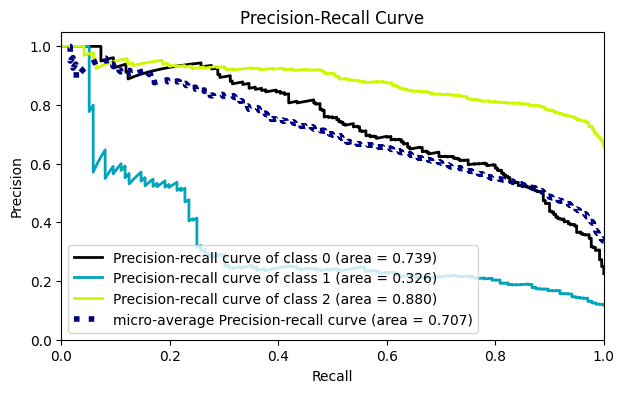

In [ ]:
from scikitplot.metrics import plot_roc, precision_recall_curve


operations_xgb = [
    ("OrdinalEncoder", column_trans),
    (
        "XGB_model",
        XGBClassifier(
            colsample_bytree=0.8,
            learning_rate=0.05,
            max_depth=2,
            n_estimators=20,
            subsample=0.8,  # only this cahnged
            random_state=101,
        ),
    ),
]

model = Pipeline(steps=operations_xgb)

model.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test_xgb, y_pred_proba)
plt.show()

In [ ]:
y_test_xgb_dummies = pd.get_dummies(y_test_xgb).values

In [ ]:
average_precision_score(y_test_xgb_dummies[:, 1], y_pred_proba[:, 1])
# || av.pr.sc der Klasse 1 entspr. Fläche unter der Kurve (der Klasse 1)

0.32636838318521066

In [ ]:
y_pred = xgb_grid_model.predict(X_test)

xgb_AP = average_precision_score(y_test_xgb_dummies[:, 1], y_pred_proba[:, 1])
xgb_f1 = f1_score(y_test_xgb, y_pred, average=None, labels=[1])
xgb_recall = recall_score(
    y_test_xgb, y_pred, average=None, labels=[1]
)  # | how to calculate them (only for 1 = Hispanic class, almost binary) pos_label, check out micro, macro

## Comparing Models

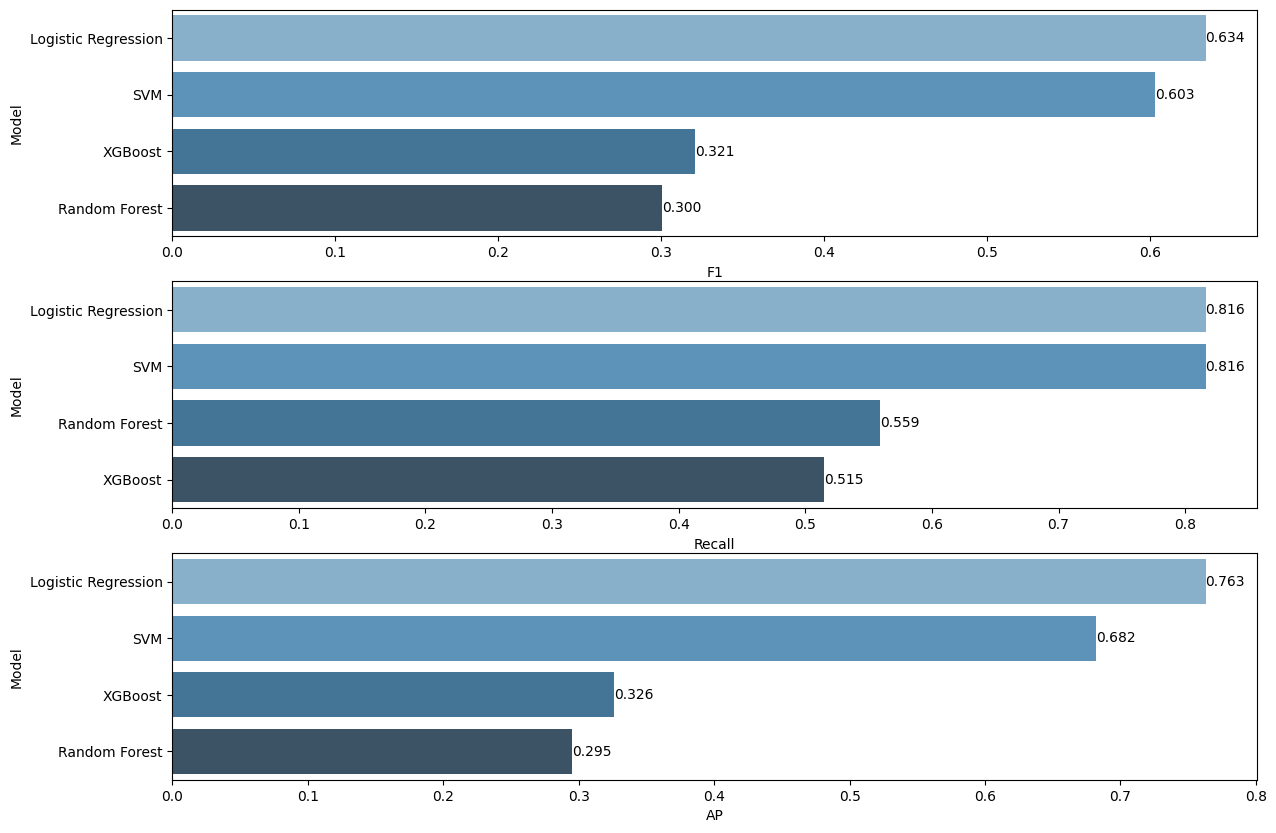

In [ ]:
compare = pd.DataFrame(
    {
        "Model": ["Logistic Regression", "SVM", "Random Forest", "XGBoost"],
        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
        "AP": [log_AP, svc_AP, rf_AP, xgb_AP],
    }
)


plt.figure(figsize=(14, 10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax = sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

---
---

In [ ]:
# | all those models are very complicated, and there is comes 1 model with 3 parameters (Log REg)
# and destroys all that. Signifcant gap between tree-based models and LogReg and SVM, tree based
# models obviously no thte best model fo rour pb.
# Log Reg. we will use !

In [ ]:
# Die Moral der Gschicht: | Probiere immer mehrere Models aus, die Ergebnisse weichen teilweise dramatisch
# voneinander ab!!!

# Before the Deployment
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [ ]:
column_trans_final = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder=MinMaxScaler(),
)

operations_final = [
    ("OneHotEncoder", column_trans_final),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

final_model = Pipeline(steps=operations_final)

In [ ]:
final_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [ ]:
X[X.Gender == "Male"].describe()

# We will make predictions on the model based on the average
# values of all male soldiers in our data.

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Age
count,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.00000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000
mean,255.449090,1442.946397,335.819441,229.590921,1331.098487,252.16594,201.229546,416.004360,358.579636,275.632213,510.927674,74.844063,331.655809,315.718389,142.434983,1021.294178,246.362401,889.500385,619.217235,504.001026,392.426520,1519.422160,289.786868,1060.496794,254.390100,1293.040267,847.637599,623.143114,356.354706,36.095153,64.171070,23.109772,244.823544,804.885099,101.893819,271.573993,349.573480,310.528084,580.702231,480.928956,1132.125673,88.379841,212.571172,193.509361,154.183637,574.708130,199.760708,344.002052,72.564504,346.256732,379.948448,1063.412670,639.948705,431.393947,450.628623,489.366504,555.224929,492.625545,73.061554,409.670685,122.684534,398.192101,435.159528,1428.469351,116.610156,430.684791,268.313927,1179.902539,364.305976,149.832265,918.678636,897.179277,594.007951,1816.628879,1758.385483,1440.699667,1122.444473,626.335214,180.739420,813.085407,469.222878,131.116697,902.586817,1666.783278,478.017953,327.110798,943.043344,238.560400,388.017440,1058.239805,858.714286,176.168761,848.762247,30.172352
std,37.295117,62.356906,17.281413,14.579399,58.714251,12.89351,10.329358,19.074837,34.511924,17.512428,32.450260,4.097052,13.970798,16.640502,6.141613,76.330564,26.4

In [ ]:
male_mean_human = X[X.Gender == "Male"].describe(include="all").loc["mean"]  # | wir konstruieren den Durchschnittsmilitärmitarbeiter
male_mean_human  # NaN for categorical features, since not possible to take mean()

abdominalextensiondepthsitting      255.44909
acromialheight                    1442.946397
acromionradialelength              335.819441
anklecircumference                 229.590921
axillaheight                      1331.098487
balloffootcircumference             252.16594
balloffootlength                   201.229546
biacromialbreadth                   416.00436
bicepscircumferenceflexed          358.579636
bicristalbreadth                   275.632213
bideltoidbreadth                   510.927674
bimalleolarbreadth                  74.844063
bitragionchinarc                   331.655809
bitragionsubmandibulararc          315.718389
bizygomaticbreadth                 142.434983
buttockcircumference              1021.294178
buttockdepth                       246.362401
buttockheight                      889.500385
buttockkneelength                  619.217235
buttockpopliteallength             504.001026
calfcircumference                   392.42652
cervicaleheight                   

In [ ]:
# Für die categorical values des Durschnittsmilitärmitarbeiters nehmen wir den Mode

In [ ]:
male_mean_human["Gender"] = "Male"
male_mean_human["SubjectsBirthLocation"] = "California"
male_mean_human["WritingPreference"] = "Right hand"

In [ ]:
pd.DataFrame(male_mean_human).T

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,Age,WritingPreference
mean,255.44909,1442.946397,335.819441,229.590921,1331.098487,252.16594,201.229546,416.00436,358.579636,275.632213,510.927674,74.844063,331.655809,315.718389,142.434983,1021.294178,246.362401,889.500385,619.217235,504.001026,392.42652,1519.42216,289.786868,1060.496794,254.3901,1293.040267,847.637599,623.143114,356.354706,36.095153,64.17107,23.109772,244.823544,804.885099,101.893819,271.573993,349.57348,310.528084,580.702231,480.928956,1132.125673,88.379841,212.571172,193.509361,154.183637,574.70813,199.760708,344.002052,72.564504,346.256732,379.948448,1063.41267,639.948705,431.393947,450.628623,489.366504,555.224929,492.625545,73.061554,409.670685,122.684534,398.192101,435.159528,1428.469351,116.610156,430.684791,268.313927,1179.902539,364.305976,149.832265,918.678636,897.179277,594.007951,1816.628879,1758.385483,1440.699667,1122.444473,626.335214,180.73942,813.085407,469.222878,131.116697,902.586817,1666.783278,478.017953,327.110798,943.043344,238.5604,388.01744,1058.239805,858.714286,176.168761,848.762247,Male,California,30.172352,Right hand


In [ ]:
# | Nun machen wir mit den Daten des Durschnittsmitarbeiters eine Prognose seiner Rasse:

In [ ]:
final_model.predict(pd.DataFrame(male_mean_human).T) #

# we can say that the average values of male soldiers are very
# close to Hispanic soldiers.

array(['Hispanic'], dtype=object)

In [ ]:
# accuracy not relialbe when you have imbalanced data sets

- Evaluation metrics
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
from sklearn.metrics import matthews_corrcoef

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

# Accuracy is an unreliable metric for unstable datasets. For this reason,
# | matthews_corrcoef and cohen_kappa_score can be used for accuracy of
# | IMBALANCED DATA SETS.

0.7831660810065028

In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7739520999384765

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [ ]:
!pip install imblearn
# = IMbalancedLEARN

In [ ]:
# conda install -c conda-forge imbalanced-learn

In [ ]:
# equalizes or approximates minority classes to the majority class.
from imblearn.over_sampling import SMOTE

# equalizes or converges the majority class to the minority class
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import (
    Pipeline as imbpipeline,
)  # we already used pipeline in Sklearn, and we don't want to overwrite it

# imblearn.pipeline is different from the pipeline library of the sklearn library.
# While the sklearn pipeline only runs the fit, transform, predict and predict_proba functions,
# imblearn.pipeline also runs the resample function.

In [ ]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder=MinMaxScaler(),
)

In [ ]:
X_train_ohe = column_trans.fit_transform(X_train)

# First, we manually transform X_train and X_test' one hot encoder.

In [ ]:
over = SMOTE()  # for oversampling
X_train_over, y_train_over = over.fit_resample(
    X_train_ohe, y_train
)  # we usu don't resample the test set

# over_sampling(smote) and under_sampling (RandomUnderSampler) apply to X_train and y_train only.
# If it is applied to all the data and then separated into data train and test set,
# data_leakage will occur and your scores will overestimated.
# The data should be split into train and test set first and then applied only to the train data.

In [ ]:
X_train_over.shape

(9102, 227)

In [ ]:
y_train_over.value_counts()

# As you can see, all classes after smote are equal to the number of
# observations of the majority class, white.

# However, equating or approximating the minority class to the majority
# class will result in overfitting of the model. Therefore, the number of observations
# belonging to the minority class should be increased in a controlled manner
# to avoid overfitting.

DODRace
Hispanic    3034
White       3034
Black       3034
Name: count, dtype: int64

In [ ]:
# now we have the same observations for each class

In [ ]:
under = RandomUnderSampler()  # now undersampling
X_train_under, y_train_under = under.fit_resample(X_train_ohe, y_train)

In [ ]:
X_train_under.shape

(1629, 227)

In [ ]:
y_train_under.value_counts()

# As you can see, all classes after RandomUnderSampler are equal to the
# number of observations in the minority class hispanic.

# Equalizing or approximating the majority class to the minority class will
# result in a very serious loss of information of the observations in
# the majority class. Even if the scores improve, this improvement will only be
# an overestimate. For this reason, a 20%-30% reduction should be done from
# the Majority class. However, if there is still no improvement in the scores,
# this rate should not be increased further.

DODRace
Black       543
Hispanic    543
White       543
Name: count, dtype: int64

In [ ]:
# it brought black and White to the level 543 = Mächstigkeit Hispanics
# it uses the variance to make sure the data for Black and White stay as respresentative as possible for the original data?

In [ ]:
over = SMOTE(sampling_strategy={"Hispanic": 1000})
under = RandomUnderSampler(sampling_strategy={"White": 2500})

# With the sampling_strategy hyperparameter, we can increase or decrease
# the classes however we want.

In [ ]:
y_train.value_counts()

DODRace
White       3034
Black       1038
Hispanic     543
Name: count, dtype: int64

In [ ]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train_ohe, y_train)

In [ ]:
y_resampled_over.value_counts()

# With over, we doubled the number of observations in the Hispanic class.
# But we need to check below whether this increase causes overfitting.
# | we do a mix of over and undersampling to avoid the dramatic steps above

DODRace
White       3034
Black       1038
Hispanic    1000
Name: count, dtype: int64

In [ ]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train_ohe, y_train)

In [ ]:
y_resampled_under.value_counts()
# We reduced the number of white observations by around 18% and equalized to 2500.  |

DODRace
White       2500
Black       1038
Hispanic     543
Name: count, dtype: int64

In [ ]:
# We automate our over_sampling and under_sampling processes.
steps = [("o", over), ("u", under)]


pipeline = imbpipeline(steps=steps)  # | first oversampling then undersampling

# First the number of hispanic cals will be increased to 1000 as per our instruction,
# and then the white class will be reduced to 2500.
X_resampled, y_resampled = pipeline.fit_resample(X_train_ohe, y_train)

In [ ]:
y_resampled.value_counts()

DODRace
White       2500
Black       1038
Hispanic    1000
Name: count, dtype: int64

In [ ]:
y_train.value_counts()

DODRace
White       3034
Black       1038
Hispanic     543
Name: count, dtype: int64

In [ ]:
# we want ot brinf this all in one pipeline

## Logistic Regression Over/Under Sampling

In [ ]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder=MinMaxScaler(),
)

In [ ]:
operations = [
    ("OneHotEncoder", column_trans),       #
    ("o", over),
    ("u", under),
    ("log", LogisticRegression(max_iter=10000, random_state=101)),
]  # ("scaler", MinMaxScaler())

# When over or under sampling is applied to data, class_weight="balanced" is never used. |

In [ ]:
smote_pipeline = imbpipeline(steps=operations)

In [ ]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('o', SMOTE(sampling_strategy={'Hispanic': 1000})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('log', LogisticRegression(max_iter=10000, random_state=101))])

In [ ]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[237   8  15]
 [  4  97  35]
 [ 14  36 708]]
              precision    recall  f1-score   support

       Black       0.93      0.91      0.92       260
    Hispanic       0.69      0.71      0.70       136
       White       0.93      0.93      0.93       758

    accuracy                           0.90      1154
   macro avg       0.85      0.85      0.85      1154
weighted avg       0.90      0.90      0.90      1154


Train_Set
[[ 951   26   61]
 [  24  379  140]
 [  27  145 2862]]
              precision    recall  f1-score   support

       Black       0.95      0.92      0.93      1038
    Hispanic       0.69      0.70      0.69       543
       White       0.93      0.94      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.86      0.85      0.85      4615
weighted avg       0.91      0.91      0.91      4615



In [ ]:
## Hispanic       0.66  it was 0.52 before
# depends won what you are trying to achieve, thies might be a better choice than teh first model

In [ ]:
model = imbpipeline(steps=operations)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.638184
train_precision_Hispanic    0.691499
test_recall_Hispanic        0.651852
train_recall_Hispanic       0.715980
test_f1_Hispanic            0.644153
train_f1_Hispanic           0.703490
dtype: float64

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [ ]:
# conda install -c conda-forge shap

In [ ]:
column_trans_shap = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder=MinMaxScaler(),
    verbose_feature_names_out=False,
)

X_train_trans = column_trans_shap.fit_transform(X_train)
X_test_trans = column_trans_shap.transform(X_test)

model_shap = LogisticRegression(
    class_weight="balanced",
    max_iter=10000,
    random_state=101,
    penalty="l1",
    solver="saga",
)

model_shap.fit(X_train_trans, y_train)

# Since the Shap doesn't work with the model fitted with pipeline,
# we will apply the conversions manually.

LogisticRegression(class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=101, solver='saga')

In [ ]:
eval_metric(model_shap, X_train_trans, y_train, X_test_trans, y_test)

Test_Set
[[244   9   7]
 [  5 111  20]
 [ 28  89 641]]
              precision    recall  f1-score   support

       Black       0.88      0.94      0.91       260
    Hispanic       0.53      0.82      0.64       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.87      0.82      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 973   34   31]
 [  19  457   67]
 [  66  350 2618]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.84      0.66       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.88      0.89      4615



In [ ]:
operations = [
    ("OneHotEncoder", column_trans_shap),
    (
        "log",
        LogisticRegression(
            class_weight="balanced",
            max_iter=10000,
            random_state=101,
            penalty="l1",
            solver="saga",
        ),
    ),
]

model = Pipeline(steps=operations)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=5, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

# no overfitting.

test_precision_Hispanic     0.488477
train_precision_Hispanic    0.547209
test_recall_Hispanic        0.764186
train_recall_Hispanic       0.843919
test_f1_Hispanic            0.595505
train_f1_Hispanic           0.663888
dtype: float64

In [ ]:
# model is not overfitting, best model to explain

In [ ]:
features = column_trans_shap.get_feature_names_out()
features

# Since we perform the transformation with the make_column_transform function,
# we will use this feature order within the Shap function since the feature
# order of the X_train_trans and X_test_trans data changes as follows.

array(['Gender_Female', 'Gender_Male', 'SubjectsBirthLocation_Alabama',
       'SubjectsBirthLocation_Alaska',
       'SubjectsBirthLocation_Antigua and Barbuda',
       'SubjectsBirthLocation_Argentina', 'SubjectsBirthLocation_Arizona',
       'SubjectsBirthLocation_Arkansas',
       'SubjectsBirthLocation_Azerbaijan',
       'SubjectsBirthLocation_Bahamas', 'SubjectsBirthLocation_Barbados',
       'SubjectsBirthLocation_Belarus', 'SubjectsBirthLocation_Belgium',
       'SubjectsBirthLocation_Belize', 'SubjectsBirthLocation_Bermuda',
       'SubjectsBirthLocation_Bolivia', 'SubjectsBirthLocation_Brazil',
       'SubjectsBirthLocation_British Virgin Islands',
       'SubjectsBirthLocation_Bulgaria',
       'SubjectsBirthLocation_California',
       'SubjectsBirthLocation_Cameroon', 'SubjectsBirthLocation_Canada',
       'SubjectsBirthLocation_Chile', 'SubjectsBirthLocation_Colombia',
       'SubjectsBirthLocation_Colorado',
       'SubjectsBirthLocation_Connecticut',
       'SubjectsBi

## Shap values for test data

In [ ]:
dir(shap)  # | either funcitons or constants

NameError: name 'shap' is not defined

In [ ]:
import shap

explainer = shap.LinearExplainer(model_shap, X_train_trans)  # LinearExplainer | Tab

shap_values = explainer.shap_values(X_test_trans)

shap.summary_plot(
    shap_values, max_display=300, feature_names=features, plot_size=(20, 100)
)

# shap asks for numpy 1.24 or lower.

# Since the shap values we get from X_test data may cause data_leakage.
# We will get the shap values from the train data below.

# Although it is recommended to use shap mostly with linear and treebased models.
# You can get shap values in non-parametric models such as KNN and SVM.# partition explainver vs kernel explainer

In [ ]:
# the first feature that contributes to Hispanice buttockkneelenght

## SHAP values for Feature Selection (train data)

In [ ]:
explainer = shap.Explainer(model_shap, X_train_trans)  # explainer now on the train set

shap_values = explainer.shap_values(X_train_trans)

shap.summary_plot(
    shap_values, max_display=300, feature_names=features, plot_size=(20, 100)
)

# blues black, pink white and green hispanic
# as you can see, there is no feature that contributes to the prediction of hispanic among
# the top 13 most important features.
# We choose 19 features that contribute to the predictions of hispanics.

In [ ]:
# if we want to improve prediciton for HIspanics, we collect the featues hat contribute to the Hispanic class
# concerning prediction power (the first 13 don't!!!)

In [ ]:
hispanic = [
    "SubjectsBirthLocation",
    "handlength",
    "forearmcircumferenceflexed",
    "headlength",
    "bitragionsubmandibulararc",
    "footbreadthhorizontal",
    "bimalleolarbreadth",
    "poplitealheight",
    "waistdepth",
    "WritingPreference",
    "tragiontopofhead",
    "bideltoidbreadth",
    "neckcircumferencebase",
    "biacromialbreadth",
    "buttockheight",
    "buttockkneelength",
    "earlength",
    "axillaheight",
    "Age",
]

In [ ]:
# X.columns

In [ ]:
X2 = X[hispanic]
X2.head()

In [ ]:
cat_new = X2.select_dtypes("object").columns
cat_new

In [ ]:
X2.shape

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y, test_size=0.2, random_state=101, stratify=y
)

In [ ]:
column_trans_shap = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_new),
    remainder=MinMaxScaler(),
    verbose_feature_names_out=False,
)  # using the model that scored the best

operations_shap = [
    ("OneHotEncoder", column_trans_shap),
    (
        "log",
        LogisticRegression(
            class_weight="balanced",
            max_iter=10000,
            random_state=101,
            penalty="l1",
            solver="saga",
        ),
    ),
]

pipe_shap_model = Pipeline(steps=operations_shap)
pipe_shap_model.fit(X_train2, y_train2)

In [ ]:
eval_metric(pipe_shap_model, X_train2, y_train2, X_test2, y_test2)

In [ ]:
# the precision is worse than before, 0,44 in 0.56 it is wrong when it is predicting it#s Hispanics

In [ ]:
model = Pipeline(steps=operations_shap)

scores = cross_validate(
    model, X_train2, y_train2, scoring=scoring, cv=5, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

In [ ]:
#

In [ ]:
y_pred_proba = pipe_shap_model.predict_proba(X_test2)

plot_precision_recall(y_test2, y_pred_proba)
plt.show();

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>
